# Libraries

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sklearn
from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
sns.set(color_codes=True)
%matplotlib inline


# Import Dataset


*   gunakan link ini untuk mengimport dataset : https://raw.githubusercontent.com/bayuazra23/datasets/main/penguins.csv
*   Simpan dataset dalam variabel bernama "df"
*   Variabel terikat untuk dataset ini adalah species dari pinguin, dengan kolom lain sebagai variable bebas




In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/bayuazra23/datasets/main/penguins.csv')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


## Label encoder untuk kolom kategorikal (run, sesuaikan kalau ada error saja)

# EDA

**General Rule** : Silahkan tambah business question lain yang bisa kalian formulasikan

## Tunjukan 5 data random dari dataset

In [3]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


## Tampilkan info, rangkuman analisis statistik (mean, std, dsb), serta jumlah nilai null untuk masing-masing kolom pada dataset

In [4]:
print("MEAN:",df.mean())
print("STD:",df.std())
print("MIN:",df.min())
print("MAX:",df.max())
print("NULL:", df.isnull().sum())

MEAN: bill_length_mm         43.921930
bill_depth_mm          17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
dtype: float64
STD: bill_length_mm         5.459584
bill_depth_mm          1.974793
flipper_length_mm     14.061714
body_mass_g          801.954536
dtype: float64
MIN: species              Adelie
island               Biscoe
bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
dtype: object
MAX: species                 Gentoo
island               Torgersen
bill_length_mm            59.6
bill_depth_mm             21.5
flipper_length_mm        231.0
body_mass_g             6300.0
dtype: object
NULL: species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


## Berapa rata-rata berat badan pinguin untuk setiap jenis kelamin?

**hint** : karena kolom species sudah di encode, silakan import ulang dataset pada variable baru, misal "df_not_encoded"

In [5]:
df_not_encoded=pd.read_csv('https://raw.githubusercontent.com/bayuazra23/datasets/main/penguins.csv')

In [6]:
df_not_encoded.groupby('sex')['body_mass_g'].mean()

sex
female    3862.272727
male      4545.684524
Name: body_mass_g, dtype: float64

## Ada berapa jumlah data pinguin untuk masing-masing pulau?

In [7]:
df_not_encoded.groupby('island')['species'].value_counts()

island     species  
Biscoe     Gentoo       124
           Adelie        44
Dream      Chinstrap     68
           Adelie        56
Torgersen  Adelie        52
Name: species, dtype: int64

## [Bonus] Business Question tambahan

In [8]:
# [Tulis business kalian menggunakan comment, lalu tulis kode dicell yang sama]
# Sebutkan pulau yang memiliki spesies chinstrap dan memiliki panjang sirip lebih dari 200mm
df_not_encoded[(df_not_encoded['species']=='Chinstrap') & (df_not_encoded['flipper_length_mm']>200)]['island'].value_counts()


Dream    18
Name: island, dtype: int64

# Visualisasi Data

**general rule** : anda akan diminta untuk membuat sebuah visualisasi untuk setiap jenis grafik yang sudah dipelajari.  Mengenai data yang digunakan untuk setiap grafik, lakukan analisis terhadap dataset, lalu tentukan kolom yang cocok untuk masing-masing jenis grafik. Sertakan reasoning terhadap grafik yang dibuat menggunakan komen, perhatikan contoh cell dibawah

## contoh

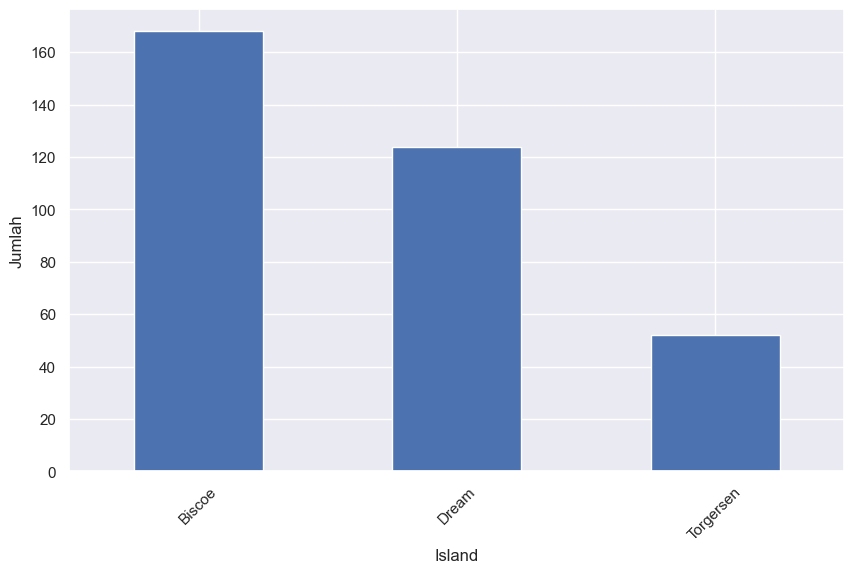

In [11]:
#Grafik barplot untuk membandingkan jumlah pinguin dari setiap pulau
data=df_not_encoded['island'].value_counts()
plt.figure(figsize=(10,6))
data.plot(kind='bar')
plt.xlabel('Island')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

## Barplot

<AxesSubplot: xlabel='species', ylabel='count'>

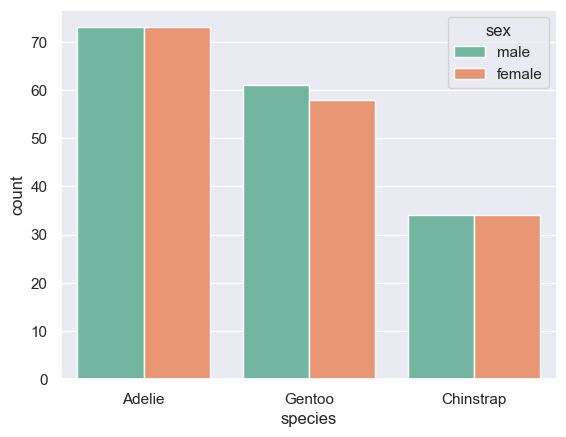

In [17]:
# Grafik barplot untuk membandingkan jumlah pinguin dari setiap sex dan spesiesnya
sns.countplot(df_not_encoded, x='species',hue='sex', palette='Set2')

## Scatterplot

<AxesSubplot: xlabel='body_mass_g', ylabel='flipper_length_mm'>

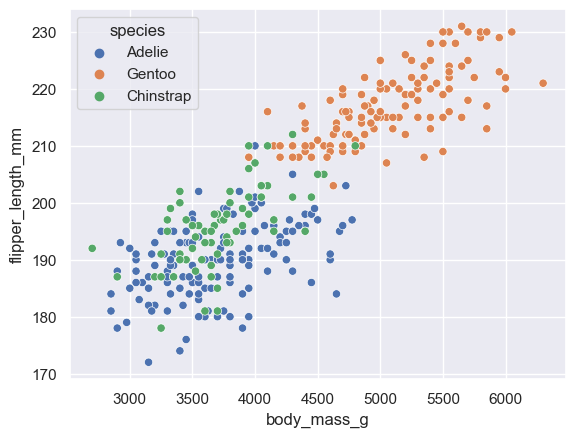

In [32]:
# Grafik scatterplot tentang korelasi flipper length dengan body mass di tiap species
sns.scatterplot(df_not_encoded, x='body_mass_g', y='flipper_length_mm', hue='species')

## Boxplot

<AxesSubplot: xlabel='species', ylabel='body_mass_g'>

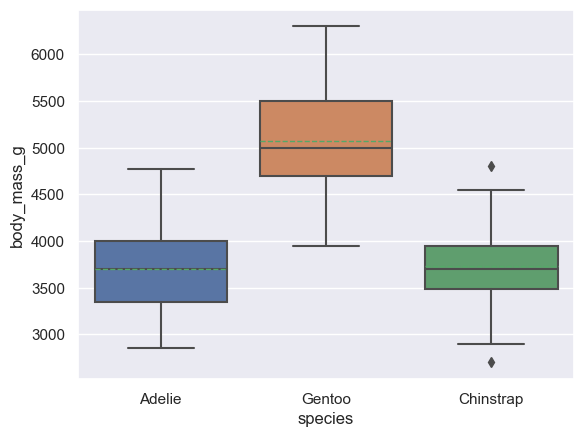

In [50]:
# Grafik boxplot tentang perbandingan antara nilai rata-rata body_mass_g spesies adelie dengan body_mass_g
sns.boxplot(df_not_encoded, x='species',y='body_mass_g', showmeans=True, meanline=True)


## Histogram

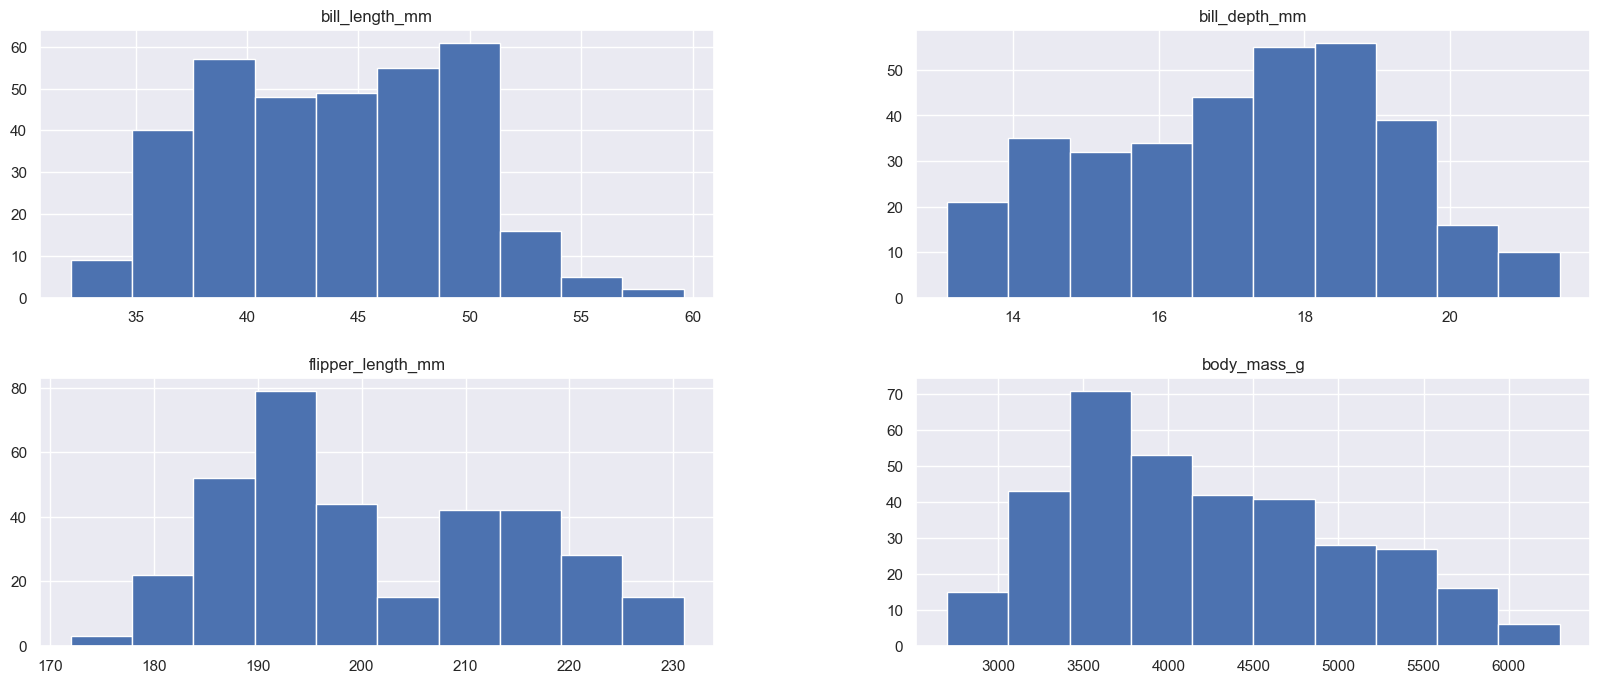

In [40]:
# Grafik Histogram tentang persebaran frekuensi tiap kolom data penguin
fig, axis = plt.subplots(figsize=(20, 8))
df_not_encoded.hist(ax=axis)
plt.show()

## Correlation Heatmap

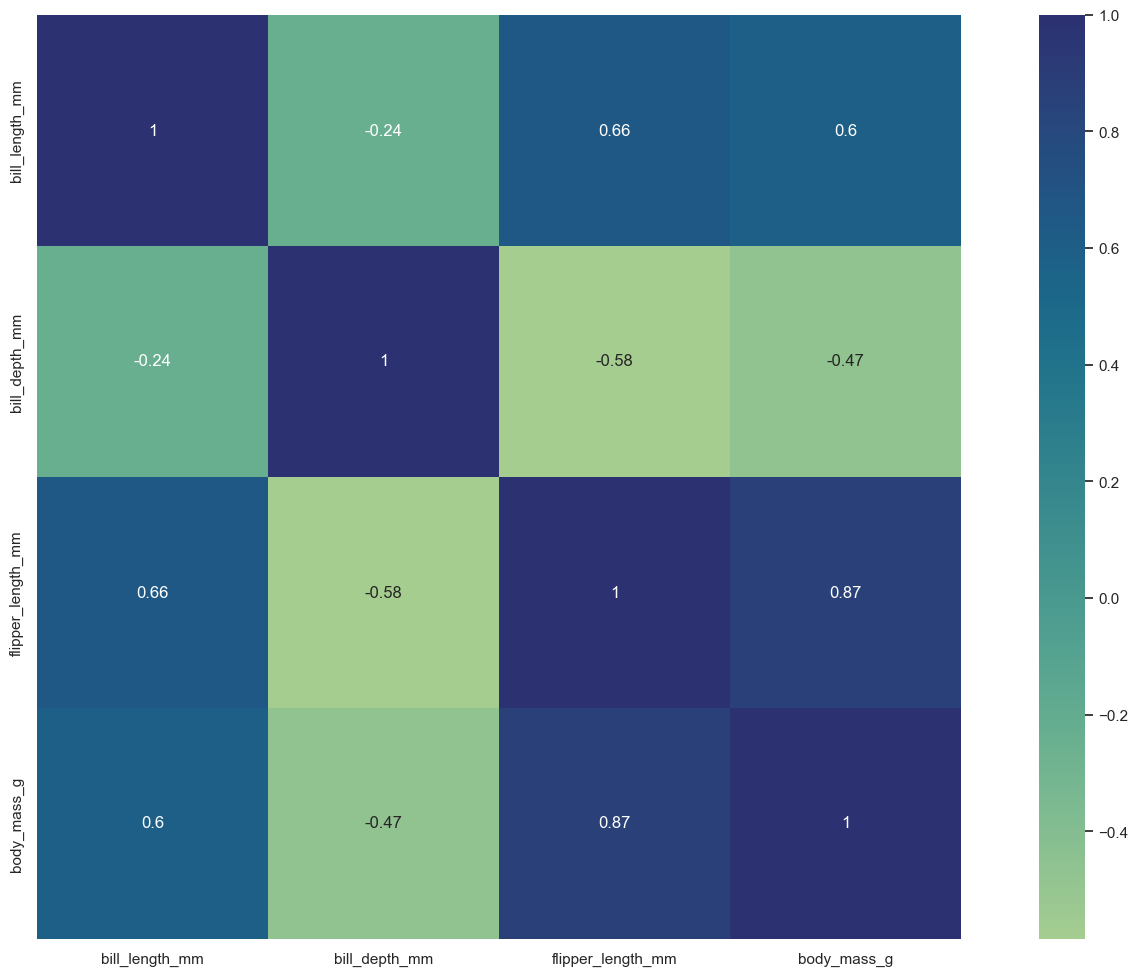

In [58]:
# Grafik Correlation Heatmap untuk mencari dan mengatahui korelasi antar data
corrmat = df.corr()
f, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(corrmat, square=True, annot=True, cmap="crest");

# Data Mining

**General Rule** :


*   Buatlah model menggunakan masing-masing algoritma
*   Lakukan spliting data dengan rasio train:test sebesar 70:30
*   Bandingkan nilai akurasi untuk splitting data tersebut dengan split data menggunakan cross validation 10 fold
*   Tampilkan juga classification report untuk masing-masing model


## Naive Bayes

In [71]:
for col in df[['sex','island']]:
  df[col] = LabelEncoder().fit_transform(df[col])

In [72]:
df_clean = df.dropna()
df_clean

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.1,18.7,181.0,3750.0,1
1,Adelie,2,39.5,17.4,186.0,3800.0,0
2,Adelie,2,40.3,18.0,195.0,3250.0,0
4,Adelie,2,36.7,19.3,193.0,3450.0,0
5,Adelie,2,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...,...
339,Chinstrap,1,55.8,19.8,207.0,4000.0,1
340,Chinstrap,1,43.5,18.1,202.0,3400.0,0
341,Chinstrap,1,49.6,18.2,193.0,3775.0,1
342,Chinstrap,1,50.8,19.0,210.0,4100.0,1


In [73]:
X = df_clean.iloc[ : , [1,2,3,4,5,6]].values
y = df_clean.iloc[:, 0].values

In [74]:
#splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state =0)

In [75]:
#algoritma
classifier=GaussianNB()
#training
classifier.fit(X_train,y_train)

#evaluasi
y_pred=classifier.predict(X_test)
#ytest kunci jawaban, ypred hasil prediksi model ML
acc=accuracy_score(y_test, y_pred)
print(acc)

0.9805825242718447


In [76]:
#testing
X_test

array([[1.000e+00, 3.960e+01, 1.810e+01, 1.860e+02, 4.450e+03, 1.000e+00],
       [1.000e+00, 4.610e+01, 1.820e+01, 1.780e+02, 3.250e+03, 0.000e+00],
       [1.000e+00, 3.750e+01, 1.850e+01, 1.990e+02, 4.475e+03, 1.000e+00],
       [1.000e+00, 4.520e+01, 1.780e+01, 1.980e+02, 3.950e+03, 0.000e+00],
       [2.000e+00, 3.920e+01, 1.960e+01, 1.950e+02, 4.675e+03, 1.000e+00],
       [1.000e+00, 4.950e+01, 1.900e+01, 2.000e+02, 3.800e+03, 1.000e+00],
       [0.000e+00, 4.940e+01, 1.580e+01, 2.160e+02, 4.925e+03, 1.000e+00],
       [0.000e+00, 3.900e+01, 1.750e+01, 1.860e+02, 3.550e+03, 0.000e+00],
       [0.000e+00, 5.110e+01, 1.630e+01, 2.200e+02, 6.000e+03, 1.000e+00],
       [1.000e+00, 3.760e+01, 1.930e+01, 1.810e+02, 3.300e+03, 0.000e+00],
       [0.000e+00, 3.550e+01, 1.620e+01, 1.950e+02, 3.350e+03, 0.000e+00],
       [0.000e+00, 4.820e+01, 1.430e+01, 2.100e+02, 4.600e+03, 0.000e+00],
       [0.000e+00, 4.200e+01, 1.350e+01, 2.100e+02, 4.150e+03, 0.000e+00],
       [0.000e+00, 3.780e

In [77]:
y_test

array(['Adelie', 'Chinstrap', 'Adelie', 'Chinstrap', 'Adelie',
       'Chinstrap', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Adelie', 'Chinstrap', 'Adelie',
       'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap',
       'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Adelie',
       'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Gentoo', 

In [78]:
y_pred

array(['Adelie', 'Chinstrap', 'Adelie', 'Chinstrap', 'Adelie',
       'Chinstrap', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Adelie', 'Chinstrap', 'Adelie',
       'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap',
       'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Chinstrap', 'Chinstrap', 'Adelie', 'Gentoo', 'Adelie',
       'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Gen

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       1.00      0.96      0.98        50
   Chinstrap       0.90      1.00      0.95        18
      Gentoo       1.00      1.00      1.00        35

    accuracy                           0.98       103
   macro avg       0.97      0.99      0.98       103
weighted avg       0.98      0.98      0.98       103



In [83]:
from sklearn.model_selection import cross_val_predict

In [84]:
y_pred = cross_val_predict(classifier, X_test, y_test, cv = 10)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

0.9583333333333334

In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       1.00      0.98      0.99        50
   Chinstrap       0.95      1.00      0.97        18
      Gentoo       1.00      1.00      1.00        35

    accuracy                           0.99       103
   macro avg       0.98      0.99      0.99       103
weighted avg       0.99      0.99      0.99       103



## KNN

*   coba nilai K sebesar 3, 5, 7, 9. Buatlah model dengan nilai K terbaik






In [86]:
X = df_clean.iloc[:, [1,2,3,4,5,6]].values
y = df_clean.iloc[:, 0].values

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [88]:
classifier=KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
acc=accuracy_score(y_test, y_pred)
print( acc)

0.8640776699029126


In [89]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
acc=accuracy_score(y_test, y_pred)
print( acc)

0.8058252427184466


In [90]:
classifier=KNeighborsClassifier(n_neighbors=7,metric='minkowski',p=2)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
acc=accuracy_score(y_test, y_pred)
print( acc)

0.8349514563106796


In [91]:
classifier=KNeighborsClassifier(n_neighbors=9,metric='minkowski',p=2)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
acc=accuracy_score(y_test, y_pred)
print( acc)

0.8640776699029126


In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       0.82      0.92      0.87        50
   Chinstrap       0.89      0.44      0.59        18
      Gentoo       0.92      1.00      0.96        35

    accuracy                           0.86       103
   macro avg       0.88      0.79      0.81       103
weighted avg       0.87      0.86      0.85       103



In [93]:
y_pred = cross_val_predict(classifier, X_test, y_test, cv = 10)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

0.7697463768115942

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       0.68      0.90      0.78        50
   Chinstrap       1.00      0.11      0.20        18
      Gentoo       0.86      0.86      0.86        35

    accuracy                           0.75       103
   macro avg       0.85      0.62      0.61       103
weighted avg       0.80      0.75      0.70       103



## SVM

In [95]:
X = df_clean.iloc[:, [1,2,3,4,5,6]].values
y = df_clean.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 11)

In [96]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = cross_val_predict(classifier, X_test, y_test, cv = 10)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

0.7195652173913045

In [97]:
accuracies

array([0.66666667, 0.79166667, 0.79166667, 0.66666667, 0.79166667,
       0.66666667, 0.625     , 0.70833333, 0.79166667, 0.69565217])

In [98]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       0.66      0.95      0.78        42
   Chinstrap       0.00      0.00      0.00        18
      Gentoo       0.93      0.91      0.92        43

    accuracy                           0.77       103
   macro avg       0.53      0.62      0.56       103
weighted avg       0.66      0.77      0.70       103



In [99]:
y_pred=classifier.predict(X_test)
acc=accuracy_score(y_test, y_pred)
print(acc)

0.7475728155339806


In [100]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       0.62      0.98      0.76        42
   Chinstrap       0.00      0.00      0.00        18
      Gentoo       0.97      0.84      0.90        43

    accuracy                           0.75       103
   macro avg       0.53      0.60      0.55       103
weighted avg       0.66      0.75      0.69       103



## Logistic Regression

In [101]:
df_clean

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.1,18.7,181.0,3750.0,1
1,Adelie,2,39.5,17.4,186.0,3800.0,0
2,Adelie,2,40.3,18.0,195.0,3250.0,0
4,Adelie,2,36.7,19.3,193.0,3450.0,0
5,Adelie,2,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...,...
339,Chinstrap,1,55.8,19.8,207.0,4000.0,1
340,Chinstrap,1,43.5,18.1,202.0,3400.0,0
341,Chinstrap,1,49.6,18.2,193.0,3775.0,1
342,Chinstrap,1,50.8,19.0,210.0,4100.0,1


In [102]:
X = df_clean.iloc[:, [1,2,3,4,5,6]].values
y = df_clean.iloc[:, 0].values

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 11)

In [104]:
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
acc=accuracy_score(y_test, y_pred)
print(acc)

0.9902912621359223


In [105]:
y_pred=classifier.predict(X_test)
acc=accuracy_score(y_test, y_pred)
print(acc)

0.9902912621359223


In [106]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       1.00      0.98      0.99        42
   Chinstrap       0.95      1.00      0.97        18
      Gentoo       1.00      1.00      1.00        43

    accuracy                           0.99       103
   macro avg       0.98      0.99      0.99       103
weighted avg       0.99      0.99      0.99       103



In [107]:
y_pred = cross_val_predict(classifier, X_test, y_test, cv = 10)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

0.9875

In [108]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        42
   Chinstrap       0.94      0.94      0.94        18
      Gentoo       1.00      1.00      1.00        43

    accuracy                           0.98       103
   macro avg       0.97      0.97      0.97       103
weighted avg       0.98      0.98      0.98       103



## Decision Tree

In [116]:
df_clean

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.1,18.7,181.0,3750.0,1
1,Adelie,2,39.5,17.4,186.0,3800.0,0
2,Adelie,2,40.3,18.0,195.0,3250.0,0
4,Adelie,2,36.7,19.3,193.0,3450.0,0
5,Adelie,2,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...,...
339,Chinstrap,1,55.8,19.8,207.0,4000.0,1
340,Chinstrap,1,43.5,18.1,202.0,3400.0,0
341,Chinstrap,1,49.6,18.2,193.0,3775.0,1
342,Chinstrap,1,50.8,19.0,210.0,4100.0,1


In [117]:
X = df_clean.iloc[:, [1,2,3,4,5,6]].values
y = df_clean.iloc[:, 0].values

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 11)

In [119]:
classifier=DecisionTreeClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
acc=accuracy_score(y_test, y_pred)
print(acc)

0.970873786407767


In [120]:
y_pred=classifier.predict(X_test)
acc=accuracy_score(y_test, y_pred)
print(acc)

0.970873786407767


In [121]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        42
   Chinstrap       0.94      0.94      0.94        18
      Gentoo       1.00      0.98      0.99        43

    accuracy                           0.97       103
   macro avg       0.97      0.97      0.97       103
weighted avg       0.97      0.97      0.97       103



In [122]:
y_pred = cross_val_predict(classifier, X_test, y_test, cv = 10)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

0.975

In [123]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       0.98      0.95      0.96        42
   Chinstrap       0.84      0.89      0.86        18
      Gentoo       0.98      0.98      0.98        43

    accuracy                           0.95       103
   macro avg       0.93      0.94      0.94       103
weighted avg       0.95      0.95      0.95       103





--------------



# Selesai 🐈